In [ ]:
import pandas as pd
from IPython.display import HTML, display, clear_output, FileLink
from tqdm.auto import tqdm
import time
pd.set_option('max_columns', None)

from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from multiprocessing import Pool
import re
from better_profanity import profanity

In [ ]:
comments_csv = './data/all_petitions_comments_20221003-100027.csv'
search_csv = 'change_org_petitions_Amber_Heard_at_20221002-105030_limit_2000_offset_0_delay_ms_5000.csv'
milestones_csv = './data/all_petitions_milestones_20221002-110814.csv'
petitions = pd.read_csv(search_csv)
comments = pd.read_csv(comments_csv)

In [ ]:
comments

In [ ]:
petitions.columns

In [ ]:
petition_by_slug = {
    p['_source.slug']: p for _, p in petitions.iterrows()
}

In [ ]:
comments = comments[comments['status_manual'] == 'against']
comments = comments.sort_values(by=['status_manual', 'commentable_entity.slug', 'created_at'],
                                       ascending=[True, True, False])

In [ ]:
def preprocess_comment(c):
    # removing HTML tags
    c = BeautifulSoup(c, "lxml").text
    
    # replacing newlines with a space
    c = c.replace("\n", " ")
    
    # removing non-alphanumeric characters
    c = re.sub(r'[^A-Za-z0-9. ]+', ' ', c)
    
    # replacing multiple spaces with a single one
    c = ' '.join(c.split())
    
    # to lowercase
    c = c.lower()
    
    return c

def map_parallel(array, fcn):
    with Pool(4) as p:
        array_out = list(tqdm(p.imap(fcn, array), total=len(array)))
        
    return array_out

comments_processed = map_parallel(comments.comment, preprocess_comment)

In [ ]:
def sensitive(c):
    mention = 'amber heard' in c
    
    if not mention: return False
    
    def threats(c):
        # https://relatedwords.io/suicide
        lst = ['die', 'kill', 'suicide', 'sick', 'ill', 'death', 'murder', 'gun', 'homicide', 'illness', 'dead']
        c_set = set(c.split())
        return any([z in c_set for z in lst])

    return threats(c) or profanity.contains_profanity(c)

In [ ]:
comments_select = map_parallel(comments_processed, sensitive)

In [16]:
import numpy as np
np.mean(comments_select)

0.016890876296407637

In [17]:
comments = comments.iloc[comments_select]

In [18]:
len(comments)

899

(array([878.,   4.,   0.,   6.,   5.,   1.,   4.,   0.,   0.,   1.]),
 array([1.60000e+01, 6.46340e+03, 1.29108e+04, 1.93582e+04, 2.58056e+04,
        3.22530e+04, 3.87004e+04, 4.51478e+04, 5.15952e+04, 5.80426e+04,
        6.44900e+04]),
 <BarContainer object of 10 artists>)

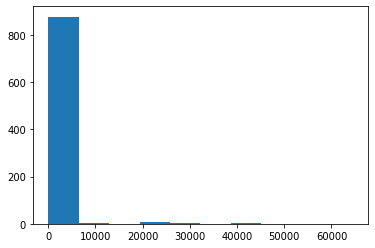

In [19]:
plt.hist([len(t) for t in comments.comment])

In [20]:
def comment_to_html(comment):
    # petition = petition_by_slug.get(comment['commentable_entity.slug'], {})
    nl = "\n"
    # petition.get('_source__ask')
    html = f"""
    <p>
    <b>{comment['user.display_name']}</b> from
        <b>{comment['user.country_code']}</b> {comment['user.state_code']} on <b>{comment.created_at}</b> ({comment.likes} likes):
    <blockquote>{comment.comment.replace(nl, '<br />')}</blockquote>
    </p>
    """
    return html

In [21]:
display(HTML(comment_to_html(comments.iloc[0])))

In [23]:
petition_htmls = ""
for petition_slug, comments_by_p in tqdm(comments.groupby('commentable_entity.slug')):
    slug = petition_slug
    petition = petition_by_slug.get(slug, {})
    htmls = [comment_to_html(c) for _, c in tqdm(comments_by_p.iterrows(), leave=False)]
    petition_desc = f"{petition.get('_source.ask', 'N/A')} ({slug}) {petition.get('_source.total_signature_count', '?')} signatures"
    petition_htmls += f"<center><h4>{petition_desc}</h4></center>{''.join(htmls)}<hr />"

  0%|          | 0/132 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [24]:
all_html = '<html><head><meta charset="utf-8"><title>All comments</title></head><body>'
all_html += petition_htmls
all_html += '</body></html>'

In [25]:
out_html = comments_csv + '.select.html'
with open(out_html, 'w') as f:
    f.write(all_html)

In [26]:
FileLink(out_html)

/home/sergia/worldie/data/all_petitions_comments_20221003-100027.csv.select.html

In [27]:
out_pdf = out_html + '.pdf'
!wkhtmltopdf {out_html} {out_pdf}
FileLink(out_pdf)

Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


/home/sergia/worldie/data/all_petitions_comments_20221003-100027.csv.select.html.pdf